# Question 2

2.1 draw decision boundaries on 2d plane

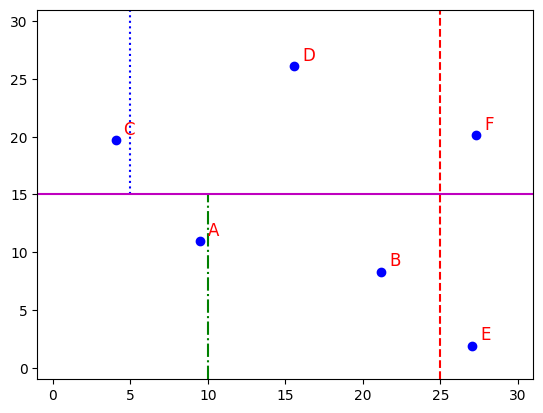

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# draw 2d dimention
fig, ax = plt.subplots()

# set x ,y
ax.set_xlim(-1, 31)
ax.set_ylim(-1, 31)

# x = 25, x = 10, x = 5
ax.axvline(x=25, color='r', linestyle='--', label='x=25')
ax.axvline(x=10, ymin=0, ymax=15/30, color='g', linestyle='-.', label='x=10')
ax.axvline(x=5, ymin=15/30, ymax=1, color='b', linestyle=':', label='x=5')

# y = 15
ax.axhline(y=15, color='m', linestyle='-', label='y=15')


def drawPoint(x_min, x_max, y_min, y_max, label):
  random_x = np.random.uniform(x_min, x_max)
  random_y = np.random.uniform(y_min, y_max)
  ax.scatter(random_x, random_y, color='b')
  ax.text(random_x + 0.5, random_y + 0.5, label, fontsize=12, color='red')

drawPoint(5, 10, 0, 15, 'A')
drawPoint(10, 25, 0, 15, 'B')
drawPoint(0, 5, 15, 30, 'C')
drawPoint(5, 25, 15, 30, 'D')
drawPoint(25, 30, 0, 15, 'E')
drawPoint(25, 30, 15, 30, 'F')


plt.show()


2.2 Give another decision tree that is syntactically different but defines the same decision boundaries.

In [ ]:
data = [['f1', 'f2', 'class'],
        ['<10','<15', 'A'],
        ['<25', '<15', 'B'],
        ['<5', '>15', 'C'],
        ['<25', '>15', 'D'],
        ['>25', '<15', 'E'],
        ['>25', '>15', 'F']]

data_df = pd.DataFrame(data[1:], columns=data[0])
data_df


x = data_df.drop("class", axis=1)
y = data_df["class"]

le = LabelEncoder()
for col in x.columns:
    x[col] = le.fit_transform(x[col])

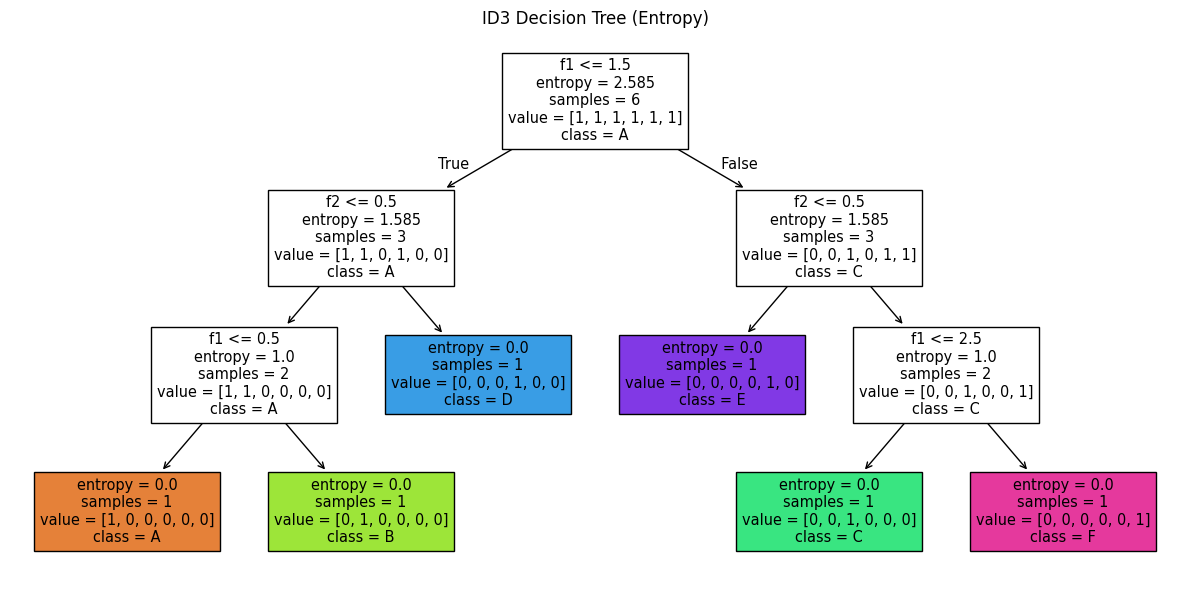

In [ ]:
# generate ID3 tree
id3_clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
id3_clf.fit(x, y)


plt.figure(figsize=(12, 6))
plot_tree(id3_clf, feature_names=x.columns, class_names=y, filled=True)
plt.title("ID3 Decision Tree (Entropy)")
plt.tight_layout()
plt.show()

# Question 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

input data

In [ ]:
# input raw data
data_raw = pd.read_csv('/content/sample_data/bank_marketing_full.csv', sep=None, engine="python")
data = pd.read_csv('/content/sample_data/bank_marketing_full.csv', sep=None, engine="python")
print("Shape of the dataset:", data.shape)
data.head()

Shape of the dataset: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


data cleaning

In [ ]:
data.dropna(inplace=True)
#delete samples containing unknown
columns_to_check = data.columns.tolist()
for col in columns_to_check:
    # data = data[~data[col].astype(str).str.contains("unknown", case=False, na=False)]
    mode_value = data[col].mode()[0]
    data[col] = data[col].replace("unknown", mode_value)
print("Shape of the dataset:", data.shape)


numeric_cols = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

# map categories into multiple columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data.head()


Shape of the dataset: (41188, 21)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


test and train

In [ ]:
X = data.drop("y", axis=1)
y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set: (32950, 47) (32950,)
Test set:  (8238, 47) (8238,)


ID3 Decision Tree

In [ ]:
id3_clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)

id3_clf.fit(X_train, y_train)
id3_preds = id3_clf.predict(X_test)

id3_acc = accuracy_score(y_test, id3_preds)
print("ID3  Decision Tree Accuracy:", id3_acc)
print("\nClassification Report:")
print(classification_report(y_test, id3_preds))


# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(id3_clf, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

ID3  Decision Tree Accuracy: 0.9181840252488468

Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7310
         yes       0.67      0.55      0.60       928

    accuracy                           0.92      8238
   macro avg       0.81      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238

Cross-Validation Scores: [0.9198786  0.91350531 0.92109256 0.91320182 0.90652504 0.90591806
 0.91168437 0.90804249 0.91502276 0.91047041]
Mean Cross-Validation Accuracy: 0.9125341426403641


CART

In [ ]:
cart_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)
cart_clf.fit(X_train, y_train)
cart_preds = cart_clf.predict(X_test)

cart_acc = accuracy_score(y_test, cart_preds)
print("CART (Gini) Decision Tree Accuracy:", cart_acc)
print("\nClassification Report:")
print(classification_report(y_test, cart_preds))

# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(cart_clf, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

CART (Gini) Decision Tree Accuracy: 0.91854819130857

Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7310
         yes       0.68      0.53      0.59       928

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238

Cross-Validation Scores: [0.91957511 0.91289833 0.92139605 0.91654021 0.91016692 0.90955994
 0.91198786 0.90925645 0.91593323 0.91198786]
Mean Cross-Validation Accuracy: 0.9139301972685889


Random Forests

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)
print("\nClassification Report:")
print(classification_report(y_test, rf_preds))

# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

Random Forest Accuracy: 0.9020393299344501

Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.99      0.95      7310
         yes       0.80      0.17      0.29       928

    accuracy                           0.90      8238
   macro avg       0.85      0.58      0.62      8238
weighted avg       0.89      0.90      0.87      8238

Cross-Validation Scores: [0.90288316 0.90257967 0.90500759 0.90409712 0.89772382 0.89954476
 0.90045524 0.90075873 0.90531108 0.90197269]
Mean Cross-Validation Accuracy: 0.9020333839150227


Gradient Boosting

In [ ]:
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)

gb_acc = accuracy_score(y_test, gb_preds)
print("Gradient Boosted Trees Accuracy:", gb_acc)
print("\nClassification Report:")
print(classification_report(y_test, gb_preds))

# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(gb_clf, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

Gradient Boosted Trees Accuracy: 0.9227967953386744

Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.97      0.96      7310
         yes       0.69      0.58      0.63       928

    accuracy                           0.92      8238
   macro avg       0.82      0.77      0.79      8238
weighted avg       0.92      0.92      0.92      8238

Cross-Validation Scores: [0.92139605 0.91350531 0.92078907 0.91441578 0.91047041 0.90955994
 0.91320182 0.90743551 0.91532625 0.91471927]
Mean Cross-Validation Accuracy: 0.9140819423368741


XGBoost

In [ ]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric="logloss"
)

y_train_map = y_train.map({"no": 0, "yes": 1})
y_test_map = y_test.map({"no": 0, "yes": 1})

xgb_clf.fit(X_train, y_train_map)
xgb_preds = xgb_clf.predict(X_test)

xgb_acc = accuracy_score(y_test_map, xgb_preds)
print("XGBoost Accuracy:", xgb_acc)
print("\nClassification Report:")
print(classification_report(y_test_map, xgb_preds))

# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(xgb_clf, X_train, y_train_map, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

XGBoost Accuracy: 0.9227967953386744

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7310
           1       0.70      0.56      0.62       928

    accuracy                           0.92      8238
   macro avg       0.82      0.76      0.79      8238
weighted avg       0.92      0.92      0.92      8238

Cross-Validation Scores: [0.92018209 0.9107739  0.92412747 0.91471927 0.9138088  0.91198786
 0.91350531 0.91198786 0.91562974 0.91654021]
Mean Cross-Validation Accuracy: 0.9153262518968133


Results Comparision

In [ ]:
models = ["ID3 (Entropy)", "CART (Gini)", "Random Forest", "Gradient Boosting", "XGBoost"]
accuracies = [id3_acc, cart_acc, rf_acc, gb_acc, xgb_acc]

results_df = pd.DataFrame({"Model": models, "Accuracy": accuracies})
# results_df.sort_values("Accuracy", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
dataname = "adult income"
print(f"Dataset: {dataname}, Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")
print(results_df)

Dataset: adult income, Train Shape: (32950, 47), Test Shape: (8238, 47)
               Model  Accuracy
0      ID3 (Entropy)  0.918184
1        CART (Gini)  0.918548
2      Random Forest  0.902039
3  Gradient Boosting  0.922797
4            XGBoost  0.922797


# Question 6

input data

In [ ]:
# input raw data
data = pd.read_csv("/content/sample_data/covertype_cs5805.csv")
print("Shape of the dataset:", data.shape)
data.head()

Shape of the dataset: (58101, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,1,0,0,0
1,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,1
2,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,1
3,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,1
4,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.dropna(inplace=True)

X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)



Train set: (46480, 54) (46480,)
Test set:  (11621, 54) (11621,)


ID3 Decision Tree

In [ ]:
id3_clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)

id3_clf.fit(X_train, y_train)
id3_preds = id3_clf.predict(X_test)

id3_acc = accuracy_score(y_test, id3_preds)
print("ID3  Decision Tree Accuracy:", id3_acc)
print("\nClassification Report:")
print(classification_report(y_test, id3_preds))


# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(id3_clf, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

ID3  Decision Tree Accuracy: 0.7095774890284829

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      4260
           1       0.73      0.80      0.76      5650
           2       0.70      0.75      0.73       722
           3       0.47      0.73      0.58        52
           4       0.95      0.11      0.19       186
           5       0.53      0.15      0.24       341
           6       0.66      0.49      0.56       410

    accuracy                           0.71     11621
   macro avg       0.68      0.53      0.53     11621
weighted avg       0.71      0.71      0.70     11621

Cross-Validation Scores: [0.69255594 0.70804647 0.70159208 0.6947074  0.70245267 0.71299484
 0.70890706 0.71320998 0.71708262 0.69771945]
Mean Cross-Validation Accuracy: 0.7049268502581756


CART

In [ ]:
cart_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)
cart_clf.fit(X_train, y_train)
cart_preds = cart_clf.predict(X_test)

cart_acc = accuracy_score(y_test, cart_preds)
print("CART (Gini) Decision Tree Accuracy:", cart_acc)
print("\nClassification Report:")
print(classification_report(y_test, cart_preds))

# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(cart_clf, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

CART (Gini) Decision Tree Accuracy: 0.7049307288529386

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      4260
           1       0.72      0.81      0.76      5650
           2       0.68      0.79      0.73       722
           3       0.53      0.50      0.51        52
           4       0.59      0.07      0.12       186
           5       0.41      0.20      0.27       341
           6       0.69      0.50      0.58       410

    accuracy                           0.70     11621
   macro avg       0.62      0.50      0.52     11621
weighted avg       0.70      0.70      0.69     11621

Cross-Validation Scores: [0.70094664 0.7035284  0.71213425 0.70202238 0.70417384 0.71041308
 0.70718589 0.7007315  0.71277969 0.69556799]
Mean Cross-Validation Accuracy: 0.7049483648881241


Random Forests

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)
print("\nClassification Report:")
print(classification_report(y_test, rf_preds))

# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

Random Forest Accuracy: 0.6861715859220376

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      4260
           1       0.71      0.79      0.75      5650
           2       0.61      0.65      0.63       722
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00       186
           5       0.00      0.00      0.00       341
           6       0.00      0.00      0.00       410

    accuracy                           0.69     11621
   macro avg       0.28      0.31      0.30     11621
weighted avg       0.63      0.69      0.66     11621

Cross-Validation Scores: [0.68201377 0.69255594 0.68782272 0.67211704 0.67835628 0.69104991
 0.69040448 0.68846816 0.69535284 0.68179862]
Mean Cross-Validation Accuracy: 0.6859939759036144


Gradient Boosting

In [ ]:
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)

gb_acc = accuracy_score(y_test, gb_preds)
print("Gradient Boosted Trees Accuracy:", gb_acc)
print("\nClassification Report:")
print(classification_report(y_test, gb_preds))

# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(gb_clf, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

Gradient Boosted Trees Accuracy: 0.8231649599862318

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      4260
           1       0.82      0.87      0.85      5650
           2       0.83      0.84      0.84       722
           3       0.65      0.69      0.67        52
           4       0.85      0.44      0.58       186
           5       0.73      0.62      0.67       341
           6       0.90      0.83      0.87       410

    accuracy                           0.82     11621
   macro avg       0.80      0.73      0.75     11621
weighted avg       0.82      0.82      0.82     11621

Cross-Validation Scores: [0.81927711 0.81454389 0.81906196 0.81518933 0.82121343 0.82271945
 0.81927711 0.82142857 0.81798623 0.81239243]
Mean Cross-Validation Accuracy: 0.8183089500860584


XGBoost

In [ ]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric="logloss"
)



xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_preds)
print("XGBoost Accuracy:", xgb_acc)
print("\nClassification Report:")
print(classification_report(y_test, xgb_preds))

# Perform cross-validation on the training data (X_train, y_train)
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

XGBoost Accuracy: 0.7840117029515532

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      4260
           1       0.79      0.84      0.82      5650
           2       0.75      0.86      0.80       722
           3       0.86      0.71      0.78        52
           4       0.91      0.23      0.36       186
           5       0.63      0.35      0.45       341
           6       0.87      0.79      0.83       410

    accuracy                           0.78     11621
   macro avg       0.80      0.65      0.69     11621
weighted avg       0.78      0.78      0.78     11621

Cross-Validation Scores: [0.77904475 0.78442341 0.77388124 0.77216007 0.77818417 0.79259897
 0.78722031 0.78442341 0.78055077 0.78679002]
Mean Cross-Validation Accuracy: 0.7819277108433735


Results Comparision

In [ ]:
models = ["ID3 (Entropy)", "CART (Gini)", "Random Forest", "Gradient Boosting", "XGBoost"]
accuracies = [id3_acc, cart_acc, rf_acc, gb_acc, xgb_acc]

results_df = pd.DataFrame({"Model": models, "Accuracy": accuracies})
# results_df.sort_values("Accuracy", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
dataname = "adult income"
print(f"Dataset: {dataname}, Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")
print(results_df)

Dataset: adult income, Train Shape: (46480, 54), Test Shape: (11621, 54)
               Model  Accuracy
0      ID3 (Entropy)  0.709577
1        CART (Gini)  0.704931
2      Random Forest  0.686172
3  Gradient Boosting  0.823165
4            XGBoost  0.784012
